In [ ]:
#-----------------------pca--------------------------

In [21]:
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [527]:
popdf=pd.read_pickle('mergeddfclean.p')
#popdf

In [528]:
#remove the top percentiles from the price changed a lot, and then create a new column
#where 0 is price != increase, and 1 is price increased, run a logistic regression and see what
q = popdf["price"].quantile(0.98)
popdf = popdf[popdf["price"] < q]

q = popdf["price"].quantile(0.02)
popdf  = popdf[popdf["price"] > q]

In [529]:
popdf2=popdf[['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016', 'price']]

In [530]:
popdf2.columns

Index(['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016',
       'RDOMESTICMIG2016', 'RBIRTH2016', 'price'],
      dtype='object')

In [531]:
popdf2.corr()

,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price
RDEATH2016,1.000000,-0.163762,-0.824252,-0.443752,-0.083083,-0.331764,-0.059340
RNETMIG2016,-0.163762,1.000000,0.038587,0.127528,0.983157,-0.106269,0.160112
RNATURALINC2016,-0.824252,0.038587,1.000000,0.413095,-0.037277,0.807610,0.062282
RINTERNATIONALMIG2016,-0.443752,0.127528,0.413095,1.000000,-0.055890,0.226079,0.063102
RDOMESTICMIG2016,-0.083083,0.983157,-0.037277,-0.055890,1.000000,-0.148635,0.149551
RBIRTH2016,-0.331764,-0.106269,0.807610,0.226079,-0.148635,1.000000,0.041964
price,-0.059340,0.160112,0.062282,0.063102,0.149551,0.041964,1.000000


In [532]:
pca=PCA()
pca=pca.fit(popdf2)
print(pca.explained_variance_)
print(pca.components_)

[1.67908374e+02 2.39359561e+01 4.22729477e+00 2.84592493e+00
 4.80542089e-03 4.16347974e-19 4.93754687e-20]
[[-2.41443655e-02  7.09187065e-01  4.93798374e-04  4.99569056e-03
   7.04191375e-01 -2.36505672e-02  8.44605660e-04]
 [-4.18735852e-01  8.18241403e-02  7.98800581e-01  1.67571213e-01
  -8.57470729e-02  3.80064730e-01  9.25692619e-04]
 [-4.79140506e-01  2.33912283e-01 -1.24468002e-01  5.09713334e-01
  -2.75801052e-01 -6.03608509e-01  2.52358667e-05]
 [ 5.11046145e-01  3.19857317e-01 -1.14418006e-01  6.15428618e-01
  -2.95571300e-01  3.96628139e-01  1.73090359e-03]
 [-4.64468022e-04 -1.23427538e-03 -5.38674532e-04 -1.23745233e-03
   3.17690907e-06 -1.00314246e-03  9.99997717e-01]
 [-1.76774031e-03 -5.77347563e-01 -1.76774032e-03  5.77347563e-01
   5.77347563e-01  1.76774031e-03  2.55422120e-11]
 [ 5.77347563e-01 -1.76774031e-03  5.77347563e-01  1.76774031e-03
   1.76774031e-03 -5.77347563e-01  5.53646606e-11]]


In [533]:
var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)

Explained variance:             [8.44090016e-01 1.20328136e-01 2.12509789e-02 1.43067124e-02
 2.41572692e-05 2.09301752e-21 2.48214780e-22]
Cumulative explained variance:  [0.84409002 0.96441815 0.98566913 0.99997584 1.         1.
 1.        ]


In [534]:
Z = pca.transform(popdf2)

features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
Z = pd.DataFrame(Z, columns=features_pca)
Z.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,7.257864,0.589098,-0.747964,-1.066826,-0.035852,-6.712196e-13,5.417913e-11
1,20.332241,0.243021,-1.055248,0.251776,-0.118013,1.245859e-10,-6.114141e-11
2,-3.007869,-1.627031,-2.167134,0.025674,-0.079913,-5.217773e-12,1.084601e-10
3,1.244440,1.325681,-2.087272,-0.725950,-0.093662,1.045705e-10,1.641967e-10
4,7.469523,-6.375214,0.335906,-0.477126,-0.155035,7.715372e-11,-1.768735e-10


In [535]:
Z.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7
PC1,1.000000e+00,3.440580e-16,8.070539e-17,1.837289e-16,4.283922e-17,3.744379e-06,8.002929e-06
PC2,3.440580e-16,1.000000e+00,-5.112178e-16,8.077989e-16,-1.619783e-16,-4.174790e-07,4.836421e-06
PC3,8.070539e-17,-5.112178e-16,1.000000e+00,-1.808201e-16,-1.729227e-17,1.204057e-06,4.104618e-06
PC4,1.837289e-16,8.077989e-16,-1.808201e-16,1.000000e+00,1.191289e-17,1.338734e-06,-2.871774e-06
PC5,4.283922e-17,-1.619783e-16,-1.729227e-17,1.191289e-17,1.000000e+00,-4.439117e-08,4.817477e-08
PC6,3.744379e-06,-4.174790e-07,1.204057e-06,1.338734e-06,-4.439117e-08,1.000000e+00,-1.690571e-08
PC7,8.002929e-06,4.836421e-06,4.104618e-06,-2.871774e-06,4.817477e-08,-1.690571e-08,1.000000e+00


In [536]:
np.cov(Z.values.T)

array([[ 1.67908374e+02,  1.11670876e-14,  2.91567273e-15,
         4.69069526e-15,  3.87190131e-17,  3.13071949e-14,
         2.30430904e-14],
       [ 1.11670876e-14,  2.39359561e+01, -4.31708656e-15,
         7.05129222e-15, -7.38639634e-18, -1.31791761e-15,
         5.25781208e-15],
       [ 2.91567273e-15, -4.31708656e-15,  4.22729477e+00,
        -4.01819961e-16, -2.66863352e-18,  1.59737333e-15,
         1.87525200e-15],
       [ 4.69069526e-15,  7.05129222e-15, -4.01819961e-16,
         2.84592493e+00, -2.91286114e-18,  1.45725020e-15,
        -1.07650869e-15],
       [ 3.87190131e-17, -7.38639634e-18, -2.66863352e-18,
        -2.91286114e-18,  4.80542089e-03, -1.98559439e-18,
         7.42063300e-19],
       [ 3.13071949e-14, -1.31791761e-15,  1.59737333e-15,
         1.45725020e-15, -1.98559439e-18,  4.16347967e-19,
        -2.42391416e-27],
       [ 2.30430904e-14,  5.25781208e-15,  1.87525200e-15,
        -1.07650869e-15,  7.42063300e-19, -2.42391416e-27,
         4.9375465

In [537]:
demo_pcs = popdf2.copy()
demo_pcs['PC1'] = Z.iloc[:,0]
demo_pcs['PC2'] = Z.iloc[:,1]

demo_pcs = pd.melt(demo_pcs, id_vars=['PC1','PC2'])

In [538]:
demo_pcs.head()
demo_pcs.columns

Index(['PC1', 'PC2', 'variable', 'value'], dtype='object')

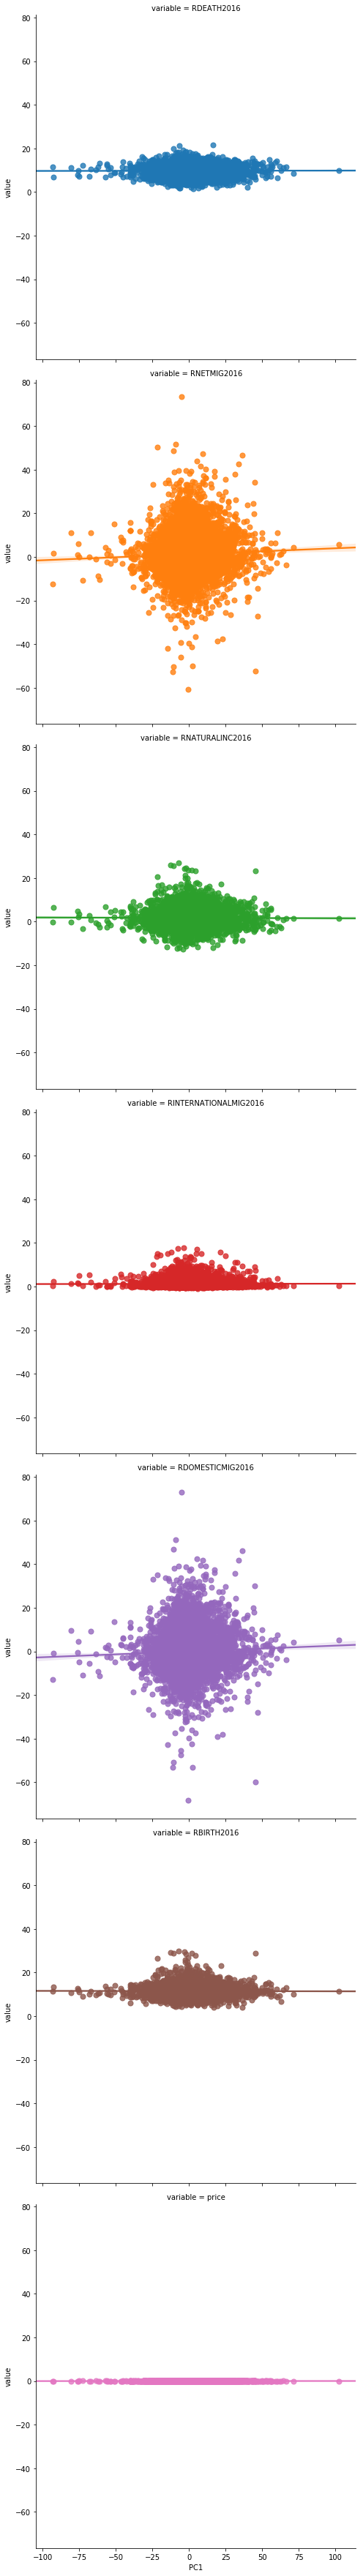

In [539]:
pc1 = sns.lmplot(x="PC1", y="value", row="variable", hue="variable", 
                 data=demo_pcs, size=7, scatter_kws={'s':50})

In [540]:
#popdf #.columns

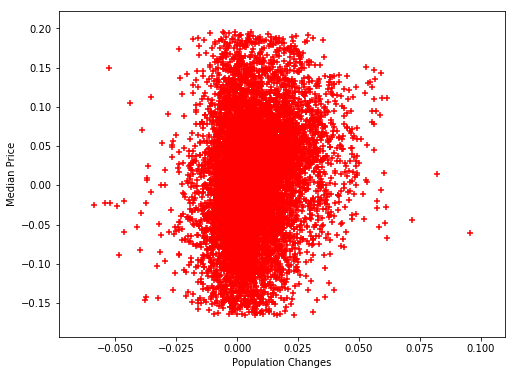

MSE: 0.004806243902376735


In [541]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = popdf2[['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016']].values
# X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = popdf2.price

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Population Changes")
plt.ylabel("Median Price")
plt.show()

print("MSE:", mean_squared_error(y, predictions))

In [542]:
#---------train test split------move this to the beginning of the popdf----------

In [543]:
from sklearn.cross_validation import train_test_split

In [544]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.8)

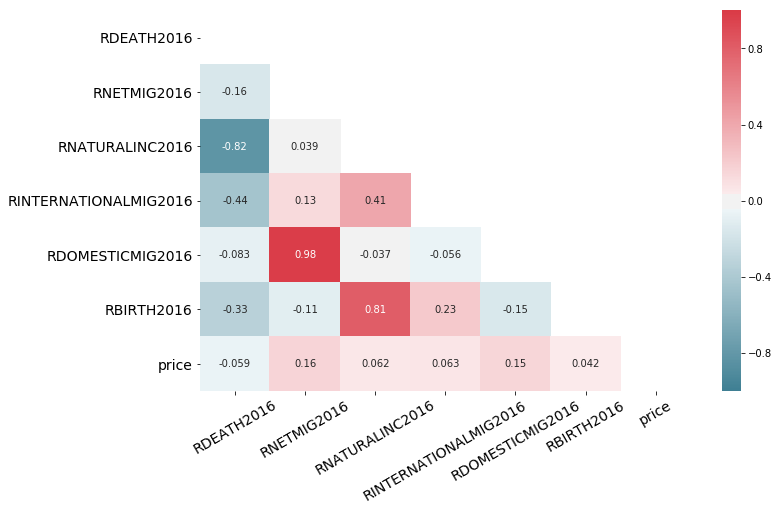

In [545]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = popdf.copy()
df_with_target['price'] = y
correlation_heat_map(df_with_target)

In [550]:
#-----------------unemployment data-------------------

In [551]:
popdf2.columns

Index(['RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016', 'RINTERNATIONALMIG2016',
       'RDOMESTICMIG2016', 'RBIRTH2016', 'price'],
      dtype='object')

In [552]:
# # pd.merge(unemp, popdf, how='left', right_on='')
# mergeddf = pd.merge(popdf,unemp, how='inner', left_on=['county', 'Year'],right_on=['county', 'Year'])
# mergeddf.head()
# del mergeddf['price_y']
# mergeddf.rename(columns={'price_x':'price', 'Rate':'UnempRate'}, inplace=True)
# mergeddf

In [553]:
import pandas as pd
import seaborn as sns
rates=pd.read_pickle('mortunempcpi.p')
rates.info()
rates.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81 entries, 0 to 80
Data columns (total 5 columns):
mortgrate    80 non-null float64
unemp        80 non-null float64
month        81 non-null int64
year         81 non-null int64
cpi          81 non-null float64
dtypes: float64(3), int64(2)
memory usage: 3.8 KB


,mortgrate,unemp,month,year,cpi
count,80.000000,80.000000,81.000000,81.000000,81.000000
mean,-0.004124,-0.008163,6.333333,2012.888889,0.001383
std,0.033593,0.020650,3.420526,1.962142,0.003163
min,-0.066815,-0.060000,1.000000,2010.000000,-0.005670
25%,-0.028227,-0.021001,3.000000,2011.000000,-0.001040
50%,-0.007365,0.000000,6.000000,2013.000000,0.001245
75%,0.010795,0.000000,9.000000,2015.000000,0.003698
max,0.149718,0.042553,12.000000,2016.000000,0.009751


In [554]:
rates.corr()

,mortgrate,unemp,month,year,cpi
mortgrate,1.000000,-0.159500,0.023154,0.033134,0.236673
unemp,-0.159500,1.000000,-0.055862,-0.011861,-0.061814
month,0.023154,-0.055862,1.000000,-0.078223,-0.623275
year,0.033134,-0.011861,-0.078223,1.000000,-0.048655
cpi,0.236673,-0.061814,-0.623275,-0.048655,1.000000


In [555]:
# rates2=rates.drop('month', axis=1)
# rates2=rates.drop('year', axis=1)
#rates

In [556]:
rates["period"] = rates["year"].map(str) + '-' + rates["month"].map(str)
rates['period'] =  pd.to_datetime(rates['period'], format='%Y-%m')


rates.set_index('period', inplace=True)
#rates['period'].reset_index()
rates

,mortgrate,unemp,month,year,cpi
period,,,,,
2010-01-01,NaN,NaN,1,2010,0.003417
2010-02-01,-0.007952,0.000000,2,2010,0.000249
2010-03-01,-0.004008,0.010204,3,2010,0.004106
2010-04-01,0.026157,0.000000,4,2010,0.001737
2010-05-01,-0.041176,-0.030303,5,2010,0.000775
2010-06-01,-0.030675,-0.020833,6,2010,-0.000976
2010-07-01,-0.037975,0.000000,7,2010,0.000211
2010-08-01,-0.028509,0.010638,8,2010,0.001381
2010-09-01,-0.018059,0.000000,9,2010,0.000582


In [557]:
 pd.to_datetime('2010-10', format='%Y-%m')

Timestamp('2010-10-01 00:00:00')

In [558]:
# popdf.set_index('Year', inplace=True)
print(popdf2.head())
print(popdf2.tail())

   RDEATH2016  RNETMIG2016  RNATURALINC2016  RINTERNATIONALMIG2016  \
0    9.218433     6.163804         2.345519               0.327282   
1    9.868812    15.757654         1.962947               0.989585   
2   11.632586    -1.280316         0.621868              -0.146322   
4    9.871136     1.755255         3.058662              -0.052136   
8   11.911623     6.186359        -3.419789               0.076849   

   RDOMESTICMIG2016  RBIRTH2016     price  
0          5.836523   11.563952 -0.024568  
1         14.768069   11.831760 -0.093731  
2         -1.133994   12.254454 -0.077495  
4          1.807391   12.929798 -0.086218  
8          6.109510    8.491835 -0.148970  
       RDEATH2016  RNETMIG2016  RNATURALINC2016  RINTERNATIONALMIG2016  \
11419    5.904510   -18.324341         6.108114               0.203604   
11420    6.189651   -19.784375         7.405073               0.225078   
11421    3.761024    -2.637040         6.570984               2.075048   
11422    6.443547  

In [560]:
popdf.columns
popdf.set_index('Year', inplace=True)
popdf['month'] = pd.DatetimeIndex(popdf.index).month
popdf['year']=pd.DatetimeIndex(popdf.index).year

In [561]:
# popdf = popdf.drop('', axis=1)

In [575]:
ratespop=pd.merge(rates, popdf, how='inner', left_on=['month', 'year'],right_on=['month', 'year'])
print(ratespop.shape)
ratespop2=ratespop.drop('year', axis=1)
ratespop2=ratespop2.drop('month', axis=1)
ratespop2=ratespop2.drop('county', axis=1)
#ratespop2=ratespop2.drop('price', axis=1)

(9320, 13)


In [576]:
ratespop2.corr()

,mortgrate,unemp,cpi,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016,price
mortgrate,1.000000,-0.196445,0.787337,-0.034643,-0.043474,0.023922,-0.054041,-0.033806,0.003776,-0.198992
unemp,-0.196445,1.000000,-0.734586,0.041237,-0.002148,-0.027799,0.013611,-0.004671,-0.003367,0.232419
cpi,0.787337,-0.734586,1.000000,-0.046036,-0.031679,0.030251,-0.039785,-0.024559,0.002454,-0.245802
RDEATH2016,-0.034643,0.041237,-0.046036,1.000000,-0.163762,-0.824252,-0.443752,-0.083083,-0.331764,-0.059340
RNETMIG2016,-0.043474,-0.002148,-0.031679,-0.163762,1.000000,0.038587,0.127528,0.983157,-0.106269,0.160112
RNATURALINC2016,0.023922,-0.027799,0.030251,-0.824252,0.038587,1.000000,0.413095,-0.037277,0.807610,0.062282
RINTERNATIONALMIG2016,-0.054041,0.013611,-0.039785,-0.443752,0.127528,0.413095,1.000000,-0.055890,0.226079,0.063102
RDOMESTICMIG2016,-0.033806,-0.004671,-0.024559,-0.083083,0.983157,-0.037277,-0.055890,1.000000,-0.148635,0.149551
RBIRTH2016,0.003776,-0.003367,0.002454,-0.331764,-0.106269,0.807610,0.226079,-0.148635,1.000000,0.041964
price,-0.198992,0.232419,-0.245802,-0.059340,0.160112,0.062282,0.063102,0.149551,0.041964,1.000000


In [577]:
ratespop2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9320 entries, 0 to 9319
Data columns (total 10 columns):
mortgrate                9320 non-null float64
unemp                    9320 non-null float64
cpi                      9320 non-null float64
RDEATH2016               9320 non-null float64
RNETMIG2016              9320 non-null float64
RNATURALINC2016          9320 non-null float64
RINTERNATIONALMIG2016    9320 non-null float64
RDOMESTICMIG2016         9320 non-null float64
RBIRTH2016               9320 non-null float64
price                    9320 non-null float64
dtypes: float64(10)
memory usage: 800.9 KB


In [578]:
ratespop2.isnull().sum()

mortgrate                0
unemp                    0
cpi                      0
RDEATH2016               0
RNETMIG2016              0
RNATURALINC2016          0
RINTERNATIONALMIG2016    0
RDOMESTICMIG2016         0
RBIRTH2016               0
price                    0
dtype: int64

In [566]:
pca=PCA()
pca=pca.fit(ratespop2)
print(pca.explained_variance_)
print(pca.components_)

var_exp = pca.explained_variance_ratio_
print('Explained variance:            ', var_exp)

cum_var_exp = np.cumsum(var_exp)
print('Cumulative explained variance: ', cum_var_exp)



[1.67908255e+02 2.39359359e+01 4.22729487e+00 2.84591986e+00
 4.13845496e-04 2.55274324e-04 3.26655239e-07 4.16245270e-19
 4.93679901e-20]
[[-5.75861450e-05 -4.71063249e-06 -7.21261657e-06 -2.41443316e-02
   7.09187299e-01  4.93697020e-04  4.99565538e-03  7.04191643e-01
  -2.36506346e-02]
 [ 7.44030862e-05 -9.01102057e-05  1.78621642e-05 -4.18736166e-01
   8.18247490e-02  7.98800946e-01  1.67571142e-01 -8.57463934e-02
   3.80064780e-01]
 [-1.42592704e-04 -4.51430102e-05 -3.72093731e-06 -4.79140439e-01
   2.33912341e-01 -1.24467989e-01  5.09713428e-01 -2.75801087e-01
  -6.03608428e-01]
 [-9.72809841e-04  4.87978541e-04 -1.60717395e-04  5.11045857e-01
   3.19858725e-01 -1.14416519e-01  6.15429387e-01 -2.95570662e-01
   3.96629337e-01]
 [-8.57906849e-01  4.89241488e-01 -1.56962969e-01 -5.58294765e-04
  -4.00110339e-04  2.26661827e-04 -7.09160282e-04  3.09049362e-04
  -3.31633017e-04]
 [ 5.00974751e-01  8.64338415e-01 -4.40838431e-02 -4.10759223e-05
   7.10158610e-05  1.26660817e-05  9.931

In [567]:
Z = pca.transform(ratespop2)

features_pca = ['PC'+str(i+1) for i in range(pca.n_components_)]
Z = pd.DataFrame(Z, columns=features_pca)
Z.head(5)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,7.257891,0.589137,-0.747965,-1.066789,-0.024137,-0.001601,0.001090,-9.949948e-13,6.240798e-11
1,20.332331,0.243135,-1.055247,0.251952,-0.026224,-0.001146,0.001086,1.258096e-10,-4.840874e-11
2,-3.007800,-1.626953,-2.167134,0.025785,-0.024945,-0.002120,0.001104,-4.799717e-12,1.193544e-10
3,1.244518,1.325772,-2.087272,-0.725813,-0.024005,-0.001895,0.001089,1.056491e-10,1.756789e-10
4,7.469657,-6.375063,0.335907,-0.476887,-0.025676,-0.001729,0.001113,7.944222e-11,-1.618503e-10


In [568]:
Z.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
PC1,1.000000e+00,-2.312925e-16,-1.850072e-16,5.646162e-16,4.433713e-14,1.278194e-13,-5.594137e-13,-5.893166e-07,1.051095e-06
PC2,-2.312925e-16,1.000000e+00,-3.387038e-16,1.066953e-15,3.316303e-15,-6.786006e-15,2.808171e-13,6.020347e-07,-3.623488e-06
PC3,-1.850072e-16,-3.387038e-16,1.000000e+00,-2.477984e-16,1.286630e-14,-9.942074e-15,-1.975331e-13,2.014268e-07,2.827589e-06
PC4,5.646162e-16,1.066953e-15,-2.477984e-16,1.000000e+00,-1.117544e-14,1.242040e-14,2.614706e-13,-5.061260e-07,-2.140327e-06
PC5,4.433713e-14,3.316303e-15,1.286630e-14,-1.117544e-14,1.000000e+00,1.043891e-14,-1.166502e-13,-3.600169e-07,3.020950e-07
PC6,1.278194e-13,-6.786006e-15,-9.942074e-15,1.242040e-14,1.043891e-14,1.000000e+00,-1.527426e-13,-2.104332e-07,-2.481415e-07
PC7,-5.594137e-13,2.808171e-13,-1.975331e-13,2.614706e-13,-1.166502e-13,-1.527426e-13,1.000000e+00,-3.308488e-07,-1.102646e-06
PC8,-5.893166e-07,6.020347e-07,2.014268e-07,-5.061260e-07,-3.600169e-07,-2.104332e-07,-3.308488e-07,1.000000e+00,-1.733223e-08
PC9,1.051095e-06,-3.623488e-06,2.827589e-06,-2.140327e-06,3.020950e-07,-2.481415e-07,-1.102646e-06,-1.733223e-08,1.000000e+00


In [569]:
np.cov(Z.values.T)

array([[ 1.67908255e+02, -1.61764939e-14, -4.91028567e-15,
         1.43343743e-14,  1.16886148e-14,  2.64572139e-14,
        -4.14255615e-15, -4.92673689e-15,  3.02622201e-15],
       [-1.61764939e-14,  2.39359359e+01, -3.69033892e-15,
         9.05810463e-15,  3.27378191e-16, -5.28103511e-16,
         7.85240200e-16,  1.90029669e-15, -3.93889839e-15],
       [-4.91028567e-15, -3.69033892e-15,  4.22729487e+00,
        -5.61175505e-16,  5.37058028e-16, -3.25704338e-16,
        -2.32172466e-16,  2.67191859e-16,  1.29172544e-15],
       [ 1.43343743e-14,  9.05810463e-15, -5.61175505e-16,
         2.84591986e+00, -3.84962298e-16,  3.36361002e-16,
         2.52144310e-16, -5.50864316e-16, -8.02258254e-16],
       [ 1.16886148e-14,  3.27378191e-16,  5.37058028e-16,
        -3.84962298e-16,  4.13845496e-04,  3.47447298e-18,
        -1.38290749e-18, -4.72516226e-18,  1.36548029e-18],
       [ 2.64572139e-14, -5.28103511e-16, -3.25704338e-16,
         3.36361002e-16,  3.47447298e-18,  2.552743

In [570]:
demo_pcs = ratespop2.copy()
demo_pcs['PC1'] = Z.iloc[:,0]
demo_pcs['PC2'] = Z.iloc[:,1]

demo_pcs = pd.melt(demo_pcs, id_vars=['PC1','PC2'])

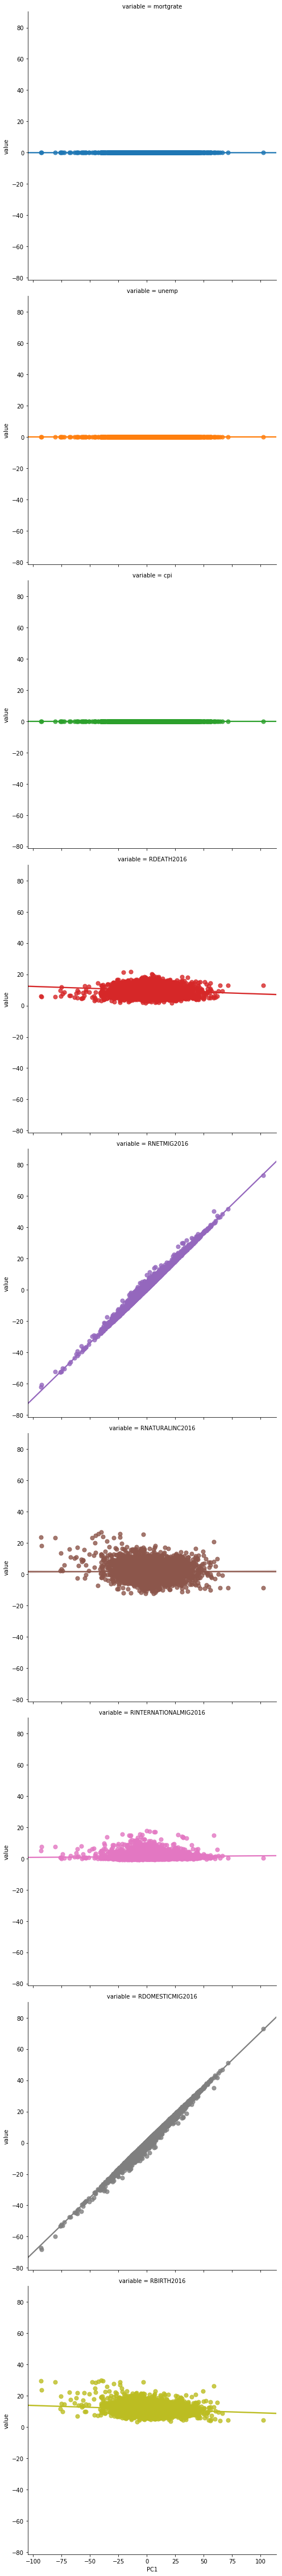

In [571]:
pc1 = sns.lmplot(x="PC1", y="value", row="variable", hue="variable", 
                 data=demo_pcs, size=7, scatter_kws={'s':50})

In [572]:
ratespop2.columns

Index(['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016',
       'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016',
       'RBIRTH2016'],
      dtype='object')

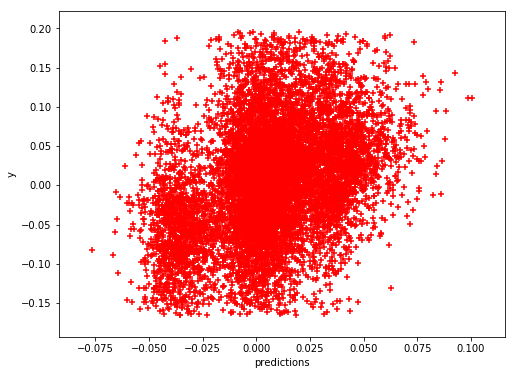

MSE: 0.004317859212428795


In [573]:
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

X = ratespop2[['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016', 'RNATURALINC2016',
       'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016', 'RBIRTH2016']].values
# X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = popdf.price

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("predictions")
plt.ylabel("y")
plt.show()

print("MSE:", mean_squared_error(y, predictions))

-------------------------------LINEAR MODEL---------------------------------

In [437]:
from sklearn import linear_model as LR

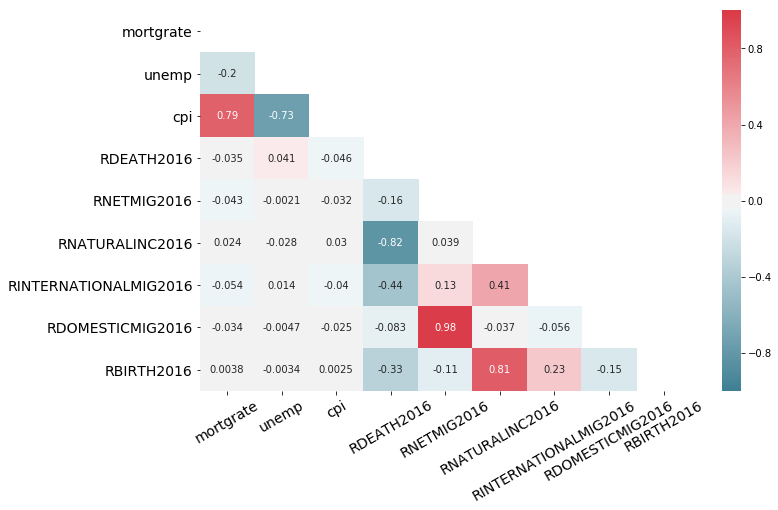

In [574]:
def correlation_heat_map(df):
    corrs = df.corr()

    # Set the default matplotlib figure size:
    fig, ax = plt.subplots(figsize=(11,7))

    # Generate a mask for the upper triangle (taken from the Seaborn example gallery):
    mask = np.zeros_like(corrs, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Plot the heatmap with Seaborn.
    # Assign the matplotlib axis the function returns. This allow us to resize the labels.
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax = sns.heatmap(corrs, mask=mask, annot=True, cmap=cmap, vmin=-1, vmax=1)

    # Resize the labels.
    ax.set_xticklabels(ax.xaxis.get_ticklabels(), fontsize=14, rotation=30)
    ax.set_yticklabels(ax.yaxis.get_ticklabels(), fontsize=14, rotation=0)

    # If you put plt.show() at the bottom, it prevents those useless printouts from matplotlib.
    plt.show()

df_with_target = ratespop2.copy()
# df_with_target['price'] = y

correlation_heat_map(df_with_target)
#ratespop2['price']=y


-----------------------TRAIN TEST SPLIT-------------------------------

In [439]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


-------------------------------MLR------------------------------------

In [440]:
len(X_train)
len(X_test)

1942

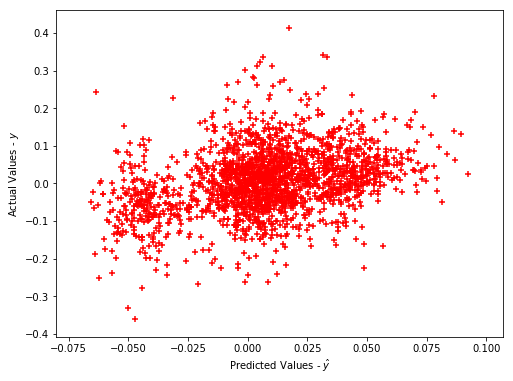

MSE: 0.006328119624779038


In [441]:
import statsmodels.api as sm

X = X_train#ratespop[['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016',
       #'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016',
       #'RBIRTH2016']].values
#X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = y_train#ratespop['price']

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X_test)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y_test, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print("MSE:", mean_squared_error(y_test, predictions))


In [442]:
ratespop[['mortgrate', 'unemp', 'cpi', 'RDEATH2016', 'RNETMIG2016',
       'RNATURALINC2016', 'RINTERNATIONALMIG2016', 'RDOMESTICMIG2016',
       'RBIRTH2016']]

,mortgrate,unemp,cpi,RDEATH2016,RNETMIG2016,RNATURALINC2016,RINTERNATIONALMIG2016,RDOMESTICMIG2016,RBIRTH2016
0,0.010616,-0.021505,0.004763,9.218433,6.163804,2.345519,0.327282,5.836523,11.563952
1,0.010616,-0.021505,0.004763,9.868812,15.757654,1.962947,0.989585,14.768069,11.831760
2,0.010616,-0.021505,0.004763,11.632586,-1.280316,0.621868,-0.146322,-1.133994,12.254454
3,0.010616,-0.021505,0.004763,9.871136,1.755255,3.058662,-0.052136,1.807391,12.929798
4,0.010616,-0.021505,0.004763,12.950211,-1.585740,-1.174622,0.910332,-2.496072,11.775588
5,0.010616,-0.021505,0.004763,11.911623,6.186359,-3.419789,0.076849,6.109510,8.491835
6,0.010616,-0.021505,0.004763,10.092682,2.721845,3.397340,1.728471,0.993374,13.490022
7,0.010616,-0.021505,0.004763,12.314073,0.715721,-1.229572,0.568907,0.146815,11.084501
8,0.010616,-0.021505,0.004763,12.890980,6.933186,-0.685410,0.184533,6.748652,12.205570
9,0.010616,-0.021505,0.004763,11.309054,-1.193043,1.056340,0.323116,-1.516159,12.365394


In [443]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     132.8
Date:                Wed, 04 Apr 2018   Prob (F-statistic):          9.49e-234
Time:                        19:03:16   Log-Likelihood:                 8842.8
No. Observations:                7764   AIC:                        -1.767e+04
Df Residuals:                    7755   BIC:                        -1.760e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.9416      0.166    -17.772      0.000      -3.266      -2.617
x2             3.5076      0.173     20.327      0.000       3.169       3.846
x3            20.6679      1.383     14.947      0.000      17.957      23.378
x4         -3.249e+06   2.33e+06     -1.396      0.163   -7.81e+06    1.31e+06
x5          1.651e+05   7.89e+05      0.209      0.834   -1.38e+06    1.71e+06
x6         -3.249e+06   2.33e+06     -1.396      0.163   -7.81e+06    1.31e+06
x7         -1.651e+05   7.89e+05     -0.209      0.834   -1.71e+06    1.38e+06
x8         -1.651e+05   7.89e+05     -0.209      0.834   -1.71e+06    1.38e+06
x9          3.249e+06   2.33e+06      1.396      0.163   -1.31e+06    7.81e+06
==============================================================================
Omnibus:                      607.992   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1364.440
Skew:                           0.497   Prob(JB):                    5.20e-297
Kurtosis:                       4.797   Cond. No.                     7.09e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.7e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [476]:
model.coeff_

AttributeError: 'OLSResults' object has no attribute 'coeff_'

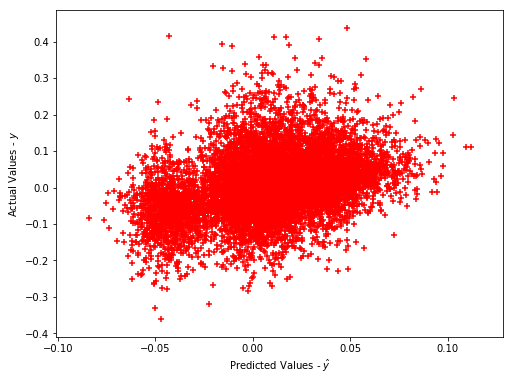

MSE: 0.006066506929422212


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 04 Apr 2018   Prob (F-statistic):          1.06e-288
Time:                        19:03:17   Log-Likelihood:                 11002.
No. Observations:                9706   AIC:                        -2.199e+04
Df Residuals:                    9699   BIC:                        -2.194e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -2.9563      0.147    -20.148      0.000      -3.244      -2.669
x2             3.5379      0.154     22.980      0.000       3.236       3.840
x3            20.8819      1.229     16.993      0.000      18.473      23.291
x4         -4.025e+06   2.06e+06     -1.955      0.051   -8.06e+06    1.08e+04
x5         -4.025e+06   2.06e+06     -1.955      0.051   -8.06e+06    1.08e+04
x6             0.0012   8.68e-05     13.279      0.000       0.001       0.001
x7          4.025e+06   2.06e+06      1.955      0.051   -1.08e+04    8.06e+06
==============================================================================
Omnibus:                      719.284   Durbin-Watson:                   1.654
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1659.350
Skew:                           0.466   Prob(JB):                         0.00
Kurtosis:                       4.799   Cond. No.                     6.92e+10
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.77e-16. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [444]:
import statsmodels.api as sm

X = ratespop[['mortgrate', 'unemp', 'cpi', 'RDEATH2016',
       'RNATURALINC2016',  'RDOMESTICMIG2016',
       'RBIRTH2016']].values
#X = np.concatenate([X, np.ones((X.shape[0], 1))], axis=1)
y = ratespop['price']

# Note the difference in argument order
# optionally, you can chain "fit()" to the model object
model = sm.OLS(y, X)
model = model.fit()
predictions = model.predict(X)

# Plot the model
plt.figure(figsize=(8,6))
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values - $\hat{y}$")
plt.ylabel("Actual Values - $y$")
plt.show()

print("MSE:", mean_squared_error(y, predictions))
model.summary()

#-----------------------LASSO REGRESSION----------------------------------

In [445]:
from sklearn.linear_model import Lasso
lassoreg = Lasso(alpha=0.001, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[-0.  0. -0. -0.  0.  0.  0.  0.  0.]


In [446]:
from sklearn import metrics
y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.084512440419738


In [447]:
lassoreg = Lasso(alpha=0.01, normalize=True)
lassoreg.fit(X_train, y_train)
print(lassoreg.coef_)

[-0.  0. -0. -0.  0.  0.  0.  0.  0.]


In [448]:

y_pred = lassoreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.084512440419738


In [449]:
from sklearn.linear_model import LassoCV
lassoregcv = LassoCV(n_alphas=10, normalize=True, random_state=1)
lassoregcv.fit(X_train, y_train)
lassoregcv.alpha_

2.2612392396900456e-07

In [450]:
print(lassoregcv.coef_)

[-3.32456000e+00  3.86015427e+00  2.39215274e+01 -0.00000000e+00
  1.26296530e-03  1.38586853e-03  9.51551207e-05  0.00000000e+00
  2.33935860e-04]


In [451]:
lassoregcv.get_params

<bound method BaseEstimator.get_params of LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=10, n_jobs=1, normalize=True, positive=False,
    precompute='auto', random_state=1, selection='cyclic', tol=0.0001,
    verbose=False)>

In [452]:
y_pred = lassoregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07925779524786734


#-------------------------RIDGE REGRESSION----------------------------------------

In [453]:
from sklearn.linear_model import Ridge
ridgereg = Ridge(alpha=0, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.0792237979126894


In [454]:
# try alpha=0.1
ridgereg = Ridge(alpha=0.1, normalize=True)
ridgereg.fit(X_train, y_train)
y_pred = ridgereg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.08060530373816982


In [455]:
print(ridgereg.coef_)


[-6.57058815e-01  1.09235199e+00  1.20037631e+00 -6.57946148e-04
  6.04599605e-04  5.78191064e-04  1.00603079e-03  5.76517795e-04
  8.89173243e-04]


In [456]:
alpha_range = 10.**np.arange(-2, 3)
alpha_range

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])

In [457]:
from sklearn.linear_model import RidgeCV
ridgeregcv = RidgeCV(alphas=alpha_range, normalize=True, scoring='neg_mean_squared_error')
ridgeregcv.fit(X_train, y_train)
ridgeregcv.alpha_

0.01

In [458]:
y_pred = ridgeregcv.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

0.07955600039958563


In [459]:
#remove the top percentiles from the price changed a lot, and then create a new column
#where 0 is price != increase, and 1 is price increased, run a logistic regression and see what
q = popdf["price"].quantile(0.99)
popdf = popdf[popdf["price"] < q]

q = popdf["price"].quantile(0.05)
popdf  = popdf[popdf["price"] > q]

In [460]:
popdf['price'].mean()

0.016518063845388894

In [461]:
print('price change mean')
print(popdf['price'].mean())
print('price change max')
print(popdf['price'].max())
print('change in price min')
print(popdf['price'].min())
#assign bool values of price column based on positive or negative values to run a logistic regression
# popdf['pricebool']=popdf[popdf['price']>0]

# df.price.apply(lambda x: 1 if x>0 else 0)   #this is BAD, changes the column itself without creating a new column
# for i in range(len(popdf['price'])):
#     if i > 0:
#         popdf['price'][i]=1
#     else:
#         val=0

price change mean
0.016518063845388894
price change max
0.4365343370928938
change in price min
-0.12691822918800244


In [469]:
((popdf['price'].values<0)==True)

array([ True,  True,  True, ..., False, False,  True])

In [471]:
popdf['price'].values

array([-0.02456784, -0.09373109, -0.07749532, ...,  0.13896915,
        0.06789361, -0.06578668])

In [470]:
popdf['pricebool'] = popdf['price'].apply(lambda x: 1 if (x > 0) else 0)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [472]:
popdf['pricebool'].head()

Year
2011-01-01    0
2011-01-01    0
2011-01-01    0
2011-01-01    0
2011-01-01    0
Name: pricebool, dtype: int64

AttributeError: 'OLSResults' object has no attribute 'feature_importances'

AttributeError: 'OLSResults' object has no attribute 'coeff_'

In [ ]:
#try a random forest regressor

#feature importance graphs

#residuals graphs

#i used the wrong df for the lasso regression